## BASIC LINEAR REGRESSION

In [14]:
import pandas as pd
ad=pd.read_csv("Advertising.csv")
df=ad.copy()
df.head()   # we have a little problem with unnamed index.It took it as a ivariable.But we can solve it easily

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
df=df.iloc[:,1:len(df)] #problem solved

In [16]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [19]:
df.isnull().values.any() # Is there any missing value ?

False

In [21]:
df.corr() #we are analyzing the correlation between variables

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


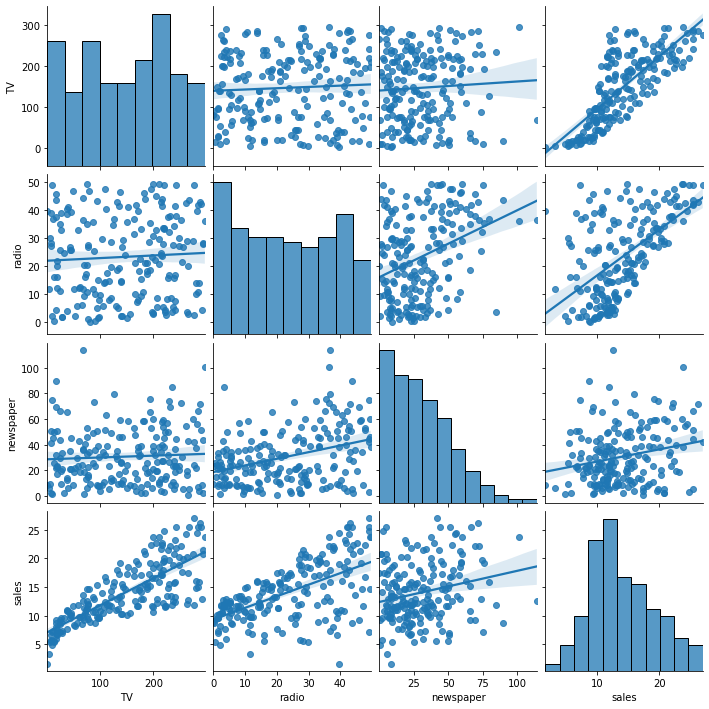

In [22]:
import seaborn as sns
sns.pairplot(df,kind="reg")

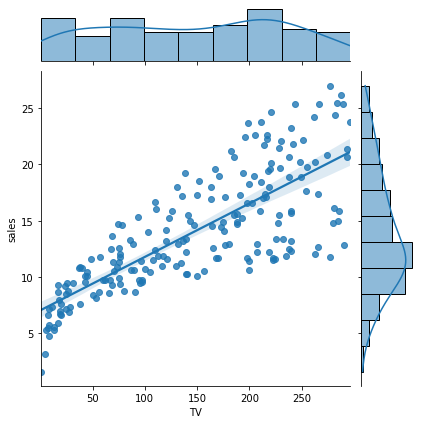

In [24]:
 sns.jointplot(x="TV",y="sales",data=df,kind="reg") # we kinda understand relation between sales and media types before forming a model

## Modelling with Statsmodels

In [30]:
import statsmodels.api as sm

In [31]:
X=df[["TV"]] #independent variable
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [32]:
X=sm.add_constant(X) # we just did it for matrix operation

In [33]:
y=df["sales"] #we also formed our dependent value

In [34]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [35]:
lm=sm.OLS(y,X) # linearmode=lm; y dependent value;X independent value

In [36]:
model=lm.fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           1.47e-42
Time:                        13:37:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# R-squared value = It is a success of explaining variability in the dependent variable of independent variable
# so we can say that "tv variable" could explain" of the variability in the "sales variable" by %60"
# Prob(F-statistic) is the p-value so we can say that model is significant
# const-coef value is the point where it cuts the y axis.So it is expeceted value of y.Kinda average sales,
# if "TV" doesnot have affect on the sales 7.03(const-coef value) is the value we already expect
#So what is the TV-coef value ?
# when there is one unit  increment in TV values,there would be an increment in the sales by 0.0475(TV-coef value)

In [41]:
import statsmodels.formula.api as smf
lm=smf.ols("sales ~ TV",df) # if we want to name it we can also use this code 
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           1.47e-42
Time:                        13:59:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [47]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [48]:
model.conf_int() # if we want to reach parameters of direction interval

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [49]:
model.f_pvalue

1.4673897001947095e-42

In [55]:
print("f_pvalue","%.2f" % model.f_pvalue)

f_pvalue 0.00


In [56]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


In [57]:
model.mse_model

3314.6181668686486

In [58]:
model.rsquared

0.611875050850071

In [59]:
model.fittedvalues[0:5] # these are predicted values

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [60]:
y[0:5] # real values

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [63]:
# let's set the equation

In [64]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


C:\Users\bbzyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


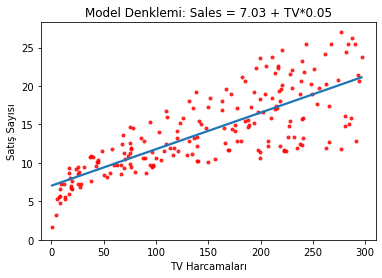

In [65]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_ # it doesn't have summary func so we did it

array([0.04753664])

In [68]:
model.score(X,y) #R-squared values

0.611875050850071

In [69]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Predicton

In [70]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

#### Sales = 7.03 + TV*0.05

In [72]:
model.predict([[30]])

array([8.45869276])